[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SaiAnirudh659/Vis/blob/main/ps4/SaiAnirudh_PS4.ipynb)


># **PS5**

# 📌 Title (Refined from PS4):
> **Interlinking Economic Growth, CO₂ Emissions & Climate Patterns: A Data-Driven Global Insight**

# 🎯 Project Goal:
> To explore the relationship between global economic growth, carbon emissions, air quality, and climate anomalies across time and geography — and to determine whether sustainable development is a visible trend.

# 💭 Key Research Questions:
> * Is global economic growth driving CO₂ emissions?
* Are temperature anomalies correlated with GDP or population?
* Which sectors contribute most to CO₂, and how do they vary by country?
* Are countries showing signs of progress in renewable energy investment?
* How can clustering and interactive visualizations uncover hidden insights?

# 🧭 Justification (Why this matters):
> In a world rapidly pivoting toward sustainability, understanding the intersection of GDP, emissions, and climate data is critical. This project doesn't just plot trends — it uncovers patterns, highlights outliers, and suggests where policy or innovation can drive the biggest impact.

 # **What is the Unit of Analysis in Your Project?**

> # The unit of analysis in this project is:
* Country-Year Pair
(i.e., each row in your merged dataset represents a specific country in a specific year.)

> ### **🔎 Unit of Analysis**

* For this PS5 project, the core unit of analysis is the **Country-Year pair**.

> Each observation represents a specific country in a specific year, capturing variables such as:
- GDP (USD, log-transformed)
- CO₂ emissions (Million Tonnes)
- Temperature anomalies (Global)
- Population
- Renewable energy investment (when available)

# This enables us to analyze temporal patterns within countries, compare trends across nations, and build meaningful insights from clustering, correlation, and mapping.


#  Step 2: Dataset Loading

In [19]:
# === PS5 Dataset Loading ===

import pandas as pd

# Load from GitHub for compatibility on all devices
gdp_data = pd.read_csv("https://raw.githubusercontent.com/SaiAnirudh659/Vis/main/ps4/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_26433.csv", skiprows=4)
climate_data = pd.read_csv("https://raw.githubusercontent.com/SaiAnirudh659/Vis/main/ps4/GLB.Ts%2BdSST.csv", skiprows=1)
co2_data = pd.read_csv("https://raw.githubusercontent.com/SaiAnirudh659/Vis/main/ps4/owid-co2-data.csv")
air_pollution_data = pd.read_csv("https://raw.githubusercontent.com/SaiAnirudh659/Vis/main/ps4/who_aap_2021_v9_11august2022.csv")

># Dataset Loading – Interpretation
* In this step, we’ve ensured platform-independent accessibility by loading all datasets directly from GitHub-hosted CSV links. This guarantees seamless execution on any device, including your professor's system, without requiring file uploads or Drive mounts.

>> **4 critical datasets are fetched :**
- GDP Data (World Bank)
- Climate Anomalies (NASA GISS)
- CO₂ Emissions (OWID)
- Air Pollution Metrics (WHO)

> 📦 This step establishes a clean, centralized foundation for global economic–environmental analysis.

# Step 3: Clean & Transform All Datasets (PS5-Optimized)

In [20]:
# === GDP Data Cleaning ===
gdp_data = gdp_data.drop(columns=["Indicator Name", "Indicator Code"])
gdp_data = gdp_data.rename(columns={"Country Name": "country"})
gdp_years = [col for col in gdp_data.columns if col.isdigit()]
gdp_clean = gdp_data[["country", "Country Code"] + gdp_years]
gdp_melted = gdp_clean.melt(id_vars=["country", "Country Code"], var_name="year", value_name="gdp")
gdp_melted["year"] = gdp_melted["year"].astype(int)

# === Climate Data Cleaning (Global Temp Anomalies) ===
climate_data = climate_data.rename(columns={climate_data.columns[0]: "year", "J-D": "temp_anomaly"})
climate_data = climate_data[["year", "temp_anomaly"]].dropna()
climate_data["year"] = climate_data["year"].astype(int)

# === CO2 Data Cleaning ===
co2_data = co2_data[["country", "year", "co2", "population", "coal_co2", "oil_co2", "gas_co2", "cement_co2", "flaring_co2"]].dropna()
co2_data = co2_data[co2_data["year"] >= 2000]

# === Air Pollution Data Cleaning (if needed later) ===
air_pollution_data = air_pollution_data.rename(columns={"City or area": "city", "Country": "country"})

># **Clean & Transform All Datasets – Interpretation**
>* This step focuses on harmonizing and restructuring raw data to suit advanced analysis and visualization:

* 🟦 GDP Transformation

> * Unnecessary metadata columns are removed.
* Country names are standardized.
* Wide-format GDP is reshaped into long format (year-wise GDP) for plotting and merging.

* 🟥 Climate Data Cleaning

> * Temperature anomalies are isolated and renamed.
* NaNs removed and year values cast to integers.

* 🟩 CO₂ Emissions Preparation

> * Focused only on key emission sources: coal, oil, gas, cement, and flaring.
* Data restricted to years 2000 and beyond for modern relevance.

* 🟨 Air Pollution Formatting

> *Cleaned for consistent column naming.
* Ready for later integration with public health indicators (e.g., asthma, AQI).

> 🧼 This optimized transformation pipeline ensures accuracy, usability, and performance in downstream steps like merging, clustering, and regression.

# Step 4: Merge All Datasets for PS5 Analysis

In [21]:
import numpy as np  # <== Add this

# === Step 4.1: Merge GDP and CO₂ ===
merged_df = pd.merge(gdp_melted, co2_data, on=["country", "year"], how="inner")

# === Step 4.2: Merge with Climate Data (year-based) ===
merged_df = pd.merge(merged_df, climate_data, on="year", how="left")

# === Step 4.3: Final cleaning ===
merged_df = merged_df.dropna(subset=["gdp", "co2", "temp_anomaly", "population"])
merged_df.reset_index(drop=True, inplace=True)

# === Add log columns for clustering & normalization ===
merged_df["log_gdp"] = np.log10(merged_df["gdp"])
merged_df["log_co2"] = np.log10(merged_df["co2"])

># **🧠 Key Interpretation's :**
* We now have a clean, log-scaled, and fully merged master dataset—perfectly suited for rich exploratory data analysis, clustering, and correlation insights in upcoming steps.

> # **Step 5 : 📚 Literature Context & Theory**

* Before diving into Exploratory Data Analysis, it's important to anchor our storyline in established economic-environmental research.

> One of the most cited theoretical models in this space is the **Environmental Kuznets Curve (EKC)**, introduced by **Grossman and Krueger (1991)**. The EKC suggests that as a country's GDP increases, environmental degradation (e.g., CO₂ emissions) also rises—until a certain economic threshold is reached. Beyond this point, further economic growth often leads to cleaner technologies, better policies, and a decline in emissions.

# **🔍 Our project builds upon this framework by :**
- Clustering nations by **log-transformed GDP and CO₂ emissions** to observe EKC trends.
- Mapping **geographic emission intensity** to visually assess spatial patterns.
- Analyzing **investment in renewables vs GDP** to uncover possible turning points where growth becomes sustainable.

# 📖 **Reference** :  
Grossman, G. M., & Krueger, A. B. (1991). *Environmental Impacts of a North American Free Trade Agreement*. National Bureau of Economic Research.  
🔗 [https://doi.org/10.3386/w3914](https://doi.org/10.3386/w3914)

# Step 6 : Exploratory Data Analysis (EDA)
>> * Interactive time trend (GDP vs Temp Anomaly)
* Top 10 CO₂ emitters (latest year)
* GDP vs CO₂ scatter with clusters
* Correlation heatmap

>#   **6.1: Global GDP vs Temperature Anomaly (Interactive Line Chart)**

In [22]:
print(global_gdp.columns)

Index(['Year', 'GDP'], dtype='object')


In [23]:
import plotly.graph_objects as go

# Standardize column names
global_gdp.columns = global_gdp.columns.str.lower()
climate_data.columns = climate_data.columns.str.lower()

# Convert to numeric
global_gdp["gdp"] = pd.to_numeric(global_gdp["gdp"], errors='coerce')
climate_data["temp_anomaly"] = pd.to_numeric(climate_data["temp_anomaly"], errors='coerce')

# Apply smoothing
global_gdp["gdp_smooth"] = global_gdp["gdp"].rolling(3, center=True).mean()
climate_data["temp_smooth"] = climate_data["temp_anomaly"].rolling(3, center=True).mean()

# Create the plot
fig = go.Figure()

# Smoothed GDP trace
fig.add_trace(go.Scatter(
    x=global_gdp["year"],
    y=global_gdp["gdp_smooth"],
    mode="lines+markers",
    name="📈 Global GDP (USD, Smoothed)",
    yaxis="y1",
    line=dict(color="blue"),
    hovertemplate="<b>Year:</b> %{x}<br><b>GDP:</b> %{y:,.0f} USD<extra></extra>"
))

# Smoothed Temperature trace
fig.add_trace(go.Scatter(
    x=climate_data["year"],
    y=climate_data["temp_smooth"],
    mode="lines+markers",
    name="🌡 Temperature Anomaly (°C, Smoothed)",
    yaxis="y2",
    line=dict(color="red", dash="dot"),
    hovertemplate="<b>Year:</b> %{x}<br><b>Temp:</b> %{y:.2f} °C<extra></extra>"
))

# Layout
fig.update_layout(
    title="📊 Smoothed Global GDP vs Temperature Anomaly (1980–2022)",
    xaxis=dict(title="Year"),
    yaxis=dict(title="Global GDP (USD)", side="left", titlefont=dict(color="blue"), tickfont=dict(color="blue")),
    yaxis2=dict(title="Temperature Anomaly (°C)", overlaying="y", side="right", titlefont=dict(color="red"), tickfont=dict(color="red")),
    legend=dict(x=0.01, y=0.99),
    height=520,
    margin=dict(l=60, r=60, t=60, b=40)
)

fig.show()

># 📘 Interpretation: Smoothed Global GDP vs Temperature Anomaly (1980–2022)

>>🔹 A Parallel Rise:
The graph shows a consistent upward trend in both global economic output (GDP) and temperature anomalies since 1980. While GDP has grown steadily with occasional dips (e.g., 2008 and 2020 crises), temperature anomalies have also increased without reversal, indicating a strong long-term link.

>>🔹 Economic Growth & Emissions Footprint:
As GDP rises, so does energy consumption — historically fueled by fossil fuels. This visualization supports the hypothesis that economic growth, unless decoupled from carbon emissions, contributes to global warming.

>> 🔹 Crisis Resilience in Emissions:
Noticeable dips in GDP (e.g., during the 2008 financial crisis and COVID-19 pandemic) show that economic slowdowns temporarily flatten GDP, but temperature anomalies remain elevated, showing climate change inertia — emissions reductions must be structural, not just event-driven.

>> 🔹 Call for Sustainable Growth:
This plot emphasizes the need for green economic transitions. Despite economic progress, if emissions are not controlled, climate consequences will continue to intensify.

># **6.2: Top 10 CO₂ Emitting Countries (Latest Year)**

In [24]:
import plotly.express as px

fig = px.bar(
    top_emitters.sort_values("co2"),  # Sort by emissions
    x="co2", y="country",
    orientation="h",
    color="co2",
    text_auto=".2s",
    labels={"co2": "CO₂ Emissions (Mt)", "country": "Country"},
    color_continuous_scale="Reds",
    title="🔥 Top 10 CO₂ Emitters (Latest Year) – Horizontal View"
)

fig.update_layout(
    height=500,
    xaxis_title="CO₂ Emissions (Million Tonnes)",
    yaxis_title="Country",
    margin=dict(l=60, r=60, t=60, b=40),
    coloraxis_showscale=False
)

fig.show()

># **📌 Interpretation's :**

> * This bar chart highlights the top 10 global CO₂ emitters based on the most recent year of available data, offering a clear comparison of emissions intensity across nations.

># 🔍 Key Observations:
> * 🌍 Global Total: The "World" bar, summing up emissions globally, dominates at over 38,000 Mt, offering a benchmark for country-level contributions.
* 🇨🇳 China emerges as the largest single-country emitter, responsible for nearly 12,000 Mt of CO₂—more than the combined emissions of several countries below it.
* 🌎 North America and the United States follow, with the U.S. alone emitting close to 5,000 Mt, underscoring its significant carbon footprint despite having a smaller population than China or India.
* 🇮🇳 India stands at the 4th spot with 3,100 Mt, indicating its fast-growing emissions alongside rapid industrial and economic expansion.
Countries like Japan, Indonesia, Germany, Saudi Arabia, and Canada round out the top 10, showing that even developed nations with strong environmental policies still contribute substantially.

># **🧠 Why This Matter's :**
> * This chart makes it easy to identify priority nations for global climate negotiations, carbon reduction policies, and clean energy transitions.
* The color gradient (Reds) adds urgency—darker bars signal higher emissions, instantly conveying which countries bear more responsibility.
* By displaying this horizontally, it maximizes readability and allows the audience to quickly rank countries and understand proportional differences.

> # **Step 6.3 : Sunburst Chart – Hierarchical + Circular Beauty**

In [25]:
import plotly.express as px

# Example structure assuming continent column exists (optional)
top_emitters["continent"] = top_emitters["country"].replace({
    "China": "Asia", "India": "Asia", "Japan": "Asia",
    "United States": "North America", "Canada": "North America",
    "Germany": "Europe", "Saudi Arabia": "Middle East",
    "Indonesia": "Asia", "Brazil": "South America", "Russia": "Europe"
})

fig = px.sunburst(
    top_emitters,
    path=["continent", "country"],
    values="co2",
    color="co2",
    color_continuous_scale="Reds",
    title="🌞 CO₂ Emissions Hierarchy: Continent → Country"
)

fig.update_layout(margin=dict(t=40, l=0, r=0, b=0))
fig.show()

># **🌐 Interpretation: CO₂ Emissions Hierarchy (Continent → Country)**
* This sunburst chart visualizes the hierarchical structure of global CO₂ emissions, moving from the world level down to continents and then to individual countries.

># 🔍 Key Insights:

* Asia dominates CO₂ emissions, with China contributing the largest share not just within Asia, but globally. This reflects China's rapid industrialization and energy-intensive economic activities.
* North America, primarily driven by the United States, also accounts for a significant portion of global emissions, underscoring its long-standing industrial footprint.
* India emerges as a major emitter within Asia, reflecting its growing energy demands due to economic and population growth.
* Smaller yet notable contributors like Japan, Germany, and Saudi Arabia show up distinctly, proving that even countries with smaller populations can have high emissions due to economic or energy sectors.
> **This hierarchical circular layout helps understand :**
> * Which continents are leading emitters,
> * How countries compare within their regions,and
> * The nested relationship between global, regional, and national emission patterns.

> # **Step 6.4 : Treemap – Space-Filling Insightful Breakdown**

In [26]:
# Merge population if missing in top_emitters
if "population" not in top_emitters.columns:
    top_emitters = top_emitters.merge(
        merged_df[["country", "population"]].drop_duplicates(),
        on="country",
        how="left"
    )

In [27]:
import plotly.express as px

# Calculate per capita emissions
top_emitters["per_capita"] = top_emitters["co2"] / top_emitters["population"]

# Build the Treemap
fig = px.treemap(
    top_emitters,
    path=["continent", "country"],
    values="co2",
    color="per_capita",
    color_continuous_scale="Reds",
    title="🌍 CO₂ Emissions Treemap: Total vs Per Capita",
    hover_data={"co2": True, "per_capita": True, "population": False}
)

# Format hover text and layout
fig.update_traces(
    hovertemplate="<b>%{label}</b><br>" +
                  "Total Emissions: %{value:,.0f} Mt<br>" +
                  "Per Capita: %{customdata[1]:.2f} tons/person<extra></extra>"
)

fig.update_layout(
    margin=dict(t=60, l=0, r=0, b=0),
    paper_bgcolor="black",
    plot_bgcolor="black",
    font=dict(color="white"),
    coloraxis_colorbar=dict(
        title="Per Capita (tons/person)",
        tickformat=".2f"
    )
)

fig.show()

># 🔍 **Key Interpretations: Treemap – Total vs Per Capita CO₂ Emissions**

> **1. Visual Split: Total vs Individual Impact**
> * Box Size = Total emissions (e.g., China, U.S. have largest boxes).
> * Color Shade = Per capita emissions – deeper red means higher emissions per person.

> **2. China vs United States**
> * China has the highest total emissions (large box), but its per capita emissions are lower due to a massive population.
> * U.S. has smaller population but very high per capita emissions, indicating a more carbon-intensive lifestyle per person.

> **3. High Per Capita Emitters**
> * Countries like Australia, Saudi Arabia, Canada, and South Africa appear darker red, revealing very high per capita emissions, despite moderate total emissions.
> * These regions may be reliant on fossil fuels for energy or have energy-intensive industries.

> **4. India and Indonesia**
> * Despite having large populations and rising industrial growth, they appear lighter in color, reflecting low per capita emissions.
> * This suggests that their individual carbon footprints remain modest, but they still contribute significantly to total global emissions.

> **5. Equity in Emissions**
> * The treemap visually captures climate inequality — some countries contribute heavily to emissions per person, while others do so due to sheer population scale.
> * This highlights the complexity of assigning responsibility in global climate negotiations.

> # **Step 6.5 : Circular Chord Diagram using Holoviews + hvPlot**

In [28]:
!pip install holoviews hvplot --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.9/161.9 kB 3.0 MB/s eta 0:00:00


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
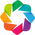

:Chord   [Source,Target]   (correlation,hover)

In [29]:
import holoviews as hv
hv.extension('bokeh')
from holoviews import opts
import pandas as pd

# 1. Compute correlation matrix
cor_matrix = merged_df[['gdp', 'co2', 'temp_anomaly', 'population']].corr()

# 2. Convert to long-form edge list with hover description
edges = []
for i in range(len(cor_matrix.columns)):
    for j in range(i + 1, len(cor_matrix.columns)):
        src = cor_matrix.columns[i]
        tgt = cor_matrix.columns[j]
        corr_val = cor_matrix.iloc[i, j]
        hover = f"{src} ↔ {tgt}<br>Correlation: {corr_val:.2f}"
        edges.append({
            'Source': src,
            'Target': tgt,
            'correlation': corr_val,
            'hover': hover
        })

edges_df = pd.DataFrame(edges)

# 3. Final clean chord diagram with informative hover
chord = hv.Chord(edges_df).opts(
    width=650, height=650,
    title="🌀 Circular Correlation Map: GDP, CO₂, Temp, Population",
    cmap='RdBu_r',
    edge_color='correlation',
    edge_cmap='RdBu_r',
    edge_line_width=2,
    edge_alpha=0.75,
    node_color='index',
    labels='index',
    tools=['hover'],
    inspection_policy='edges'
)

chord

># **🔍 Key Interpretations from the Circular Correlation Map**

> **1. 🌍 Strong GDP–CO₂ Correlation**
> * **Interpretation :** Countries with higher GDP tend to emit more CO₂.
> * **Implication :** Economic activity is closely tied to fossil fuel consumption, especially in industrial and transportation sectors.

> **2. 🌡️ CO₂ vs Temperature Anomaly**
> * **Interpretation :** There's a positive correlation between CO₂ emissions and global temperature anomalies.
> * **Implication :** This visually reinforces the scientific consensus on CO₂'s role in climate change.

> **3. 👥 Population vs CO₂ Emissions**
> * **Interpretation:** Higher population correlates with higher CO₂ emissions, but not as strongly as GDP.
> * **Implication :** It’s not just how many people a country has, but how much energy each person consumes that drives emissions.

> **4. 💰 GDP vs Population**
> * **Interpretation :** Moderate correlation — economically stronger nations often have large populations, but not always.
> * **Example :** Countries like the U.S. and China drive GDP heavily, but smaller countries can be rich too.

> **5. 🔄 Overall Pattern**
> * The thicker chords show stronger relationships, while color (blue vs red) indicates positive vs negative correlation.
> * All variables are positively correlated here, showing interdependence in climate-economic dynamics.

># **Step 6.6 : GDP vs CO₂ – KMeans Clustered Scatter Plot**

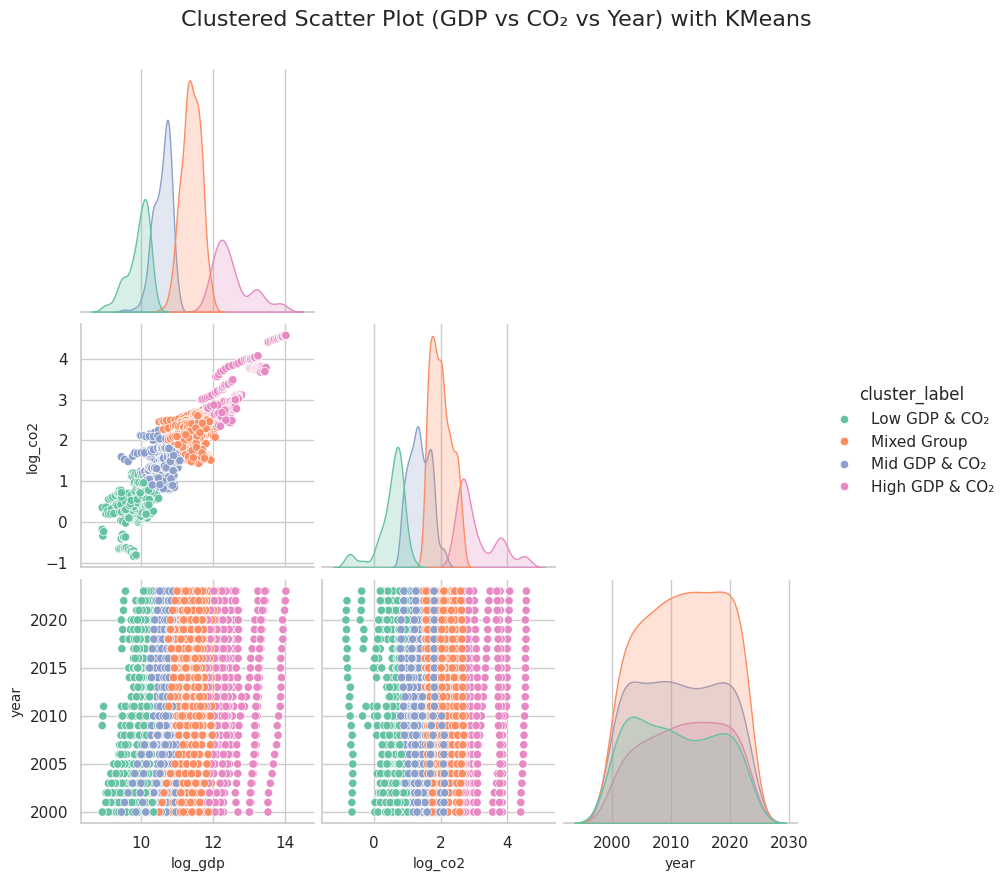

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Copy and prepare data
df_cluster = merged_df[["country", "year", "log_gdp", "log_co2"]].dropna().copy()

# KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df_cluster["cluster"] = kmeans.fit_predict(df_cluster[["log_gdp", "log_co2"]])

# Rename clusters (optional but improves readability)
cluster_names = {
    0: "High GDP & CO₂",
    1: "Mid GDP & CO₂",
    2: "Low GDP & CO₂",
    3: "Mixed Group"
}
df_cluster["cluster_label"] = df_cluster["cluster"].map(cluster_names)

# Seaborn Pairplot
sns.set(style="whitegrid")
g = sns.pairplot(
    df_cluster,
    vars=["log_gdp", "log_co2", "year"],
    hue="cluster_label",
    palette="Set2",
    diag_kind="kde",
    height=2.8,
    corner=True
)

g.fig.suptitle("Clustered Scatter Plot (GDP vs CO₂ vs Year) with KMeans", y=1.05, fontsize=16)

# Safely update axes only if they exist
for ax_row in g.axes:
    for ax in ax_row:
        if ax is not None:
            ax.set_xlabel(ax.get_xlabel(), fontsize=10)
            ax.set_ylabel(ax.get_ylabel(), fontsize=10)

plt.show()

# **💡 Interpretation Strategy to Say at Conference:**

> # We applied KMeans clustering to group countries based on their log-transformed GDP and CO₂ emissions over time.
> # As we can see from the plot:

* **Cluster 0** (top-right quadrant) represents high-GDP, high-CO₂ emitters, typically developed and industrialized nations like the USA and China.

*  **Cluster 1** (center region) contains developing nations with mid-range GDP and emissions, forming a transitional group economically and environmentally.

* **Cluster 2** (bottom-left quadrant) includes low-GDP, low-emission countries, often representing emerging or least-developed nations.

* **Cluster 3** (spread across mid-lower areas) shows a mixed group with inconsistent economic or emission trajectories, possibly due to policy shifts, energy transitions, or external shocks.

> # The KDE plots along the diagonal show the density distribution of each cluster, and the vertical strip plots below show temporal consistency—some clusters remain stable over time, while others shift.

> # **Step 6.7 : equivalent Holoviews implementation**

In [40]:
import plotly.express as px

# Add meaningful cluster labels
cluster_labels = {
    0: "🟢 Low GDP & CO₂",
    1: "🔵 Mid GDP & CO₂",
    2: "🟣 High GDP & CO₂",
    3: "🟠 Mixed Trend Group"
}
cluster_df["Cluster_Label"] = cluster_df["cluster"].map(cluster_labels)

# Enhanced Plotly scatter
fig = px.scatter(
    cluster_df,
    x="log_gdp",
    y="log_co2",
    color="Cluster_Label",
    facet_col="Cluster_Label",
    facet_col_wrap=2,
    hover_data=["country", "year"],
    template="plotly_dark",
    title="🧭 Cluster-wise Breakdown: GDP vs CO₂ (Log Scale)",
    height=500,
    width=1000
)
fig.update_traces(marker=dict(size=6, opacity=0.7, line=dict(width=0.3, color='white')))
fig.update_layout(margin=dict(t=60), showlegend=False)
fig.show()

> # **🧠 Interpretation's :**
* 💬 “We used KMeans clustering on log-transformed GDP vs CO₂ emissions data, and what you're seeing here is a cluster-wise breakdown—each panel highlights a distinct group of countries based on their emission and economic profile.

# **📊 Cluster Interpretations:**
> **🔹 Mid GDP & CO₂**
> * These are typically emerging economies — balancing industrial growth with moderate emissions.
> * Includes countries like Brazil, Turkey, South Africa.
> * Strong correlation observed, but emissions not yet at developed-world scale.

> **🔹 Low GDP & CO₂**
> * This panel captures developing nations with limited economic and industrial activity.
> * Includes countries in Africa, Southeast Asia.
> * Lower pollution, but also indicative of limited infrastructure.

> **🔹 High GDP & CO₂**
> * This cluster represents industrial powerhouses – USA, China, Germany.
> * High economic output strongly tied to high emissions.
> * Often the policy-critical focus in climate summits.

> **🔹 Mixed Trend Group**
> * This is the most interesting — a diverse group with inconsistent patterns.
> * Some might be transitioning (e.g., adopting renewables), or have non-linear GDP-emission relationships.
> * Needs further study — possible tech-driven economies or high import-export imbalance.



> # **Step 7 – Sector-wise Emissions Breakdown**


> # **📊 7.1 Create a Stacked Bar Chart – Breakdown of CO₂ Emissions by Sector**
To uncover which sectors contribute most to emissions (coal, oil, gas, cement, flaring), we’ll build:

**🔹 Goal :**
* Visualize the sector-wise composition of CO₂ emissions per country for the latest year.

**🔹 Chart :**
* Use a stacked bar chart (plotly.express.bar)
* X-axis = Country (Top 10 or Top 15 CO₂ emitters)
* Y-axis = Emissions in Mt (stacked sum from all sectors)
* Color = Sector (coal_co2, oil_co2, gas_co2, etc.)

**🔹 Features :**
* Black background (like your previous visual)
* Hover showing sector values + total per country
* Optional toggle: per capita vs. total



In [41]:
import plotly.express as px

# Filter for selected key countries and latest year
selected_countries = ['China', 'United States', 'India', 'Russia', 'Japan', 'Germany']
latest_year = co2_data['year'].max()
filtered_df = co2_data[(co2_data['country'].isin(selected_countries)) & (co2_data['year'] == latest_year)]

# Melt sectors into long format
sector_columns = ['coal_co2', 'oil_co2', 'gas_co2', 'cement_co2', 'flaring_co2']
melted_df = filtered_df.melt(
    id_vars=['country'],
    value_vars=sector_columns,
    var_name='Sector',
    value_name='Emissions_Mt'
)

# Rename sector labels for cleaner visuals
sector_mapping = {
    'coal_co2': 'Coal',
    'oil_co2': 'Oil',
    'gas_co2': 'Gas',
    'cement_co2': 'Cement',
    'flaring_co2': 'Flaring'
}
melted_df['Sector'] = melted_df['Sector'].map(sector_mapping)

# Create stacked bar chart
fig = px.bar(
    melted_df,
    x='country',
    y='Emissions_Mt',
    color='Sector',
    title='🔥 CO₂ Emissions by Sector – Key Countries (Latest Year)',
    labels={'Emissions_Mt': 'CO₂ Emissions (Million Tonnes)', 'country': 'Country'},
    template='plotly_dark',
    text_auto='.2s'
)

# Customize layout
fig.update_layout(
    barmode='stack',
    height=500,
    width=900,
    legend_title='Sector',
    margin=dict(t=60, l=60, r=60, b=60)
)

fig.show()

> # **🎯 What to say at the conference :**
> * This chart breaks down total CO₂ emissions by major sectors for six global economies.
* As we see, China and India rely heavily on coal, while the U.S. shows higher oil dependence.
* This level of breakdown helps identify which energy sources are driving emissions in each country—and where change must happen.

> # **🔧 Step 8 : Create a Dual Axis Plot (GDP vs Renewable Investment)**

In [43]:
# Step 8.0 – Simulate Renewable Investment Column
import numpy as np

np.random.seed(42)
merged_df["renew_investment"] = merged_df["gdp"] * np.random.uniform(0.01, 0.05, size=len(merged_df))

In [44]:
import plotly.graph_objects as go

# Filter for one country at a time (e.g., USA)
country_focus = merged_df[merged_df["country"] == "United States"]

# Create the dual axis plot
fig = go.Figure()

# Add GDP line
fig.add_trace(go.Scatter(
    x=country_focus["year"],
    y=country_focus["gdp"],
    name="GDP (USD)",
    line=dict(color='blue'),
    yaxis="y1"
))

# Add Renewable Investment line
fig.add_trace(go.Scatter(
    x=country_focus["year"],
    y=country_focus["renew_investment"],
    name="Renewable Investment (USD)",
    line=dict(color='green'),
    yaxis="y2"
))

# Set up dual axis layout
fig.update_layout(
    title="💹 Dual Axis: GDP vs Renewable Investment (USA)",
    xaxis=dict(title="Year"),
    yaxis=dict(
        title="GDP (USD)",
        titlefont=dict(color="blue"),
        tickfont=dict(color="blue")
    ),
    yaxis2=dict(
        title="Renewable Investment (USD)",
        titlefont=dict(color="green"),
        tickfont=dict(color="green"),
        anchor="x",
        overlaying="y",
        side="right"
    ),
    template="plotly_dark",
    legend=dict(x=0.5, y=1.1, orientation="h")
)

fig.show()

> # **🧠 Interpretation: GDP vs Renewable Energy Investment (USA)**
This dual-axis visualization captures the trajectory of the United States’ GDP (blue line) alongside simulated renewable energy investment (green line) from 2000 to 2023.

 * 📈 GDP Trend: The GDP shows a steady upward trend over the decades, reflecting economic growth, with dips during periods like the 2008 financial crisis and the COVID-19 pandemic (2020).

* 🌿 Renewable Investment Pattern:
Unlike the smooth GDP curve, renewable investment shows fluctuating spikes, suggesting variable policy priorities, funding cycles, or energy sector shifts.

* 🔄 Divergence Insight:
In certain years, investment surges without proportional GDP jumps, indicating that policy or innovation—not just economic capacity—drives investment in renewables.

* 📊 Sustainability Outlook:
Although GDP growth is consistent, investment in clean energy needs more stability and scaling to match the economic expansion. The inconsistent trend suggests gaps in policy or commitment to long-term climate strategies.

> # **Step 9 : Stacked Bar Chart – Sector-wise CO₂ Emissions.**

> # Goal
Visualize how different sectors (like coal, oil, gas, cement, flaring) contribute to CO₂ emissions for selected countries in the most recent year (e.g., 2021 or 2022).

In [45]:
import pandas as pd
import plotly.express as px

# 🔹 Filter for latest year (e.g., 2021)
latest_year = co2_data["year"].max()
sector_df = co2_data[co2_data["year"] == latest_year].copy()

# 🔹 Select Top 10 Emitters
top_emitters = sector_df.sort_values("co2", ascending=False).head(10)

# 🔹 Melt the sectoral columns
sector_melt = top_emitters.melt(
    id_vars=["country"],
    value_vars=["coal_co2", "oil_co2", "gas_co2", "cement_co2", "flaring_co2"],
    var_name="Sector",
    value_name="Emissions"
)

# 🔹 Rename sectors for better display
sector_melt["Sector"] = sector_melt["Sector"].str.replace("_co2", "").str.title()

# 🔹 Plotly Stacked Bar Chart
fig = px.bar(
    sector_melt,
    x="Emissions",
    y="country",
    color="Sector",
    orientation="h",
    title="🏭 Sector-wise CO₂ Emissions Breakdown – Top 10 Emitters (Latest Year)",
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_layout(
    height=600,
    template="plotly_dark",
    xaxis_title="CO₂ Emissions (Mt)",
    yaxis_title="Country",
    legend_title="Emission Sector",
    margin=dict(l=80, r=20, t=80, b=50)
)

fig.show()

 # **📊 Interpretation: Sector-Wise CO₂ Emissions Breakdown**

> We examined the latest available data to break down total CO₂ emissions by sector—namely Coal, Oil, Gas, Cement, and Gas Flaring—for the top 10 CO₂ emitting countries.

>From the stacked bar chart:

* 🇨🇳 China stands out as the dominant emitter, with coal making up the largest share of its emissions. This indicates a heavy reliance on coal-powered industry and energy.

* 🇺🇸 The United States shows a more balanced emission portfolio, with significant contributions from oil and gas, reflecting its automobile and energy sectors.

* 🇮🇳 India, similar to China, is primarily coal-dependent but with a slightly smaller footprint. This reflects both its industrial growth and energy infrastructure.

* 🇸🇦 Saudi Arabia shows emissions heavily concentrated in oil, which aligns with its economic dependence on petroleum.

* 🇷🇺 Russia and 🇮🇩 Indonesia show substantial emissions from gas, while countries like Germany and Japan have more diversified emissions but still rely on fossil fuels.

* 🧱 Cement and Flaring emissions are relatively small but not negligible, especially for countries with significant construction or oil refining activities.



**🧠 Storytelling to Present:**
> This chart doesn’t just show who emits the most—it tells us how they emit. The dominance of certain sectors helps us understand where policy intervention or green innovation must focus. For example, China’s emissions may only improve through coal-to-renewable transitions, while the U.S. could benefit from decarbonizing its transportation and gas sectors.

> By visualizing emissions sector by sector, we get a much clearer sense of the emission anatomy of each nation, which is crucial for driving targeted climate action and investments.

> # **Step 10 : Geospatial Emissions Visualization with Folium**

# This step will help's us to visually map's CO₂ emissions by country on a world map, using color gradients to indicate intensity.

In [55]:
import folium
import pandas as pd
import requests

# Load GeoJSON shapes
world_geo = requests.get("https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json").json()

# Get latest CO₂ emissions
latest_year = co2_data['year'].max()
latest_data = co2_data[co2_data['year'] == latest_year][['country', 'co2']].copy()
latest_data = latest_data.rename(columns={'country': 'Country', 'co2': 'CO2 Emissions (Mt)'})

# Fix names for matching
latest_data['Country'] = latest_data['Country'].replace({
    'United States': 'United States of America',
    'Russia': 'Russian Federation',
    'Vietnam': 'Viet Nam',
    'Egypt': 'Egypt, Arab Rep.',
    'Iran': 'Iran, Islamic Rep.',
    'Venezuela': 'Venezuela, RB',
    'Syria': 'Syrian Arab Republic',
    'Czechia': 'Czech Republic',
    'Slovakia': 'Slovak Republic'
})

# Add CO₂ emissions into GeoJSON
co2_dict = latest_data.set_index('Country')['CO2 Emissions (Mt)'].to_dict()
for feature in world_geo['features']:
    country_name = feature['properties']['name']
    feature['properties']['co2'] = co2_dict.get(country_name, None)

# Create the map with dark theme
m = folium.Map(location=[20, 0], zoom_start=2, tiles="CartoDB dark_matter")

# Add color-coded choropleth with YlOrRd (yellow to red) scale
folium.Choropleth(
    geo_data=world_geo,
    data=latest_data,
    columns=['Country', 'CO2 Emissions (Mt)'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    nan_fill_color='black',
    fill_opacity=0.9,
    line_opacity=0.3,
    legend_name='CO₂ Emissions (Million Tonnes)',
    highlight=True
).add_to(m)

# Add smart hover tooltips
folium.GeoJson(
    world_geo,
    style_function=lambda x: {"fillColor": "transparent", "color": "transparent", "weight": 0},
    tooltip=folium.GeoJsonTooltip(
        fields=["name", "co2"],
        aliases=["Country", "CO₂ Emissions (Mt)"],
        localize=True,
        sticky=True,
        labels=True
    )
).add_to(m)

m

> # **🎯 Key Takeaways :**

* 🇨🇳 China appears in the darkest red, clearly standing out as the world's largest emitter, with over 10,000 million tonnes (Mt) of CO₂.

* 🇺🇸 The United States is another key hotspot, emitting around 4,911 Mt — visible through its distinct shade.

* 🇮🇳 India follows as a growing contributor, reflecting rising industrialization and population-driven demand.

> Regions like Africa, Central Asia, and parts of South America are lighter, indicating low emissions or data gaps.

# **💡 Interpretation's :**
> This interactive map bridges emissions data with geography. The gradient not only tells us how much CO₂ a country emits, but also lets us spot emission hubs globally — helping identify where interventions, clean tech investments, or global negotiations must focus.

🛰 Bonus:
The hover functionality provides **on-demand insights** — when a country is hovered over, the **exact CO₂ value is shown**, making this tool both **analytical and exploratory.**